In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [7]:
data = pd.read_csv('movieReplicationSet-2.csv')
movies = data.iloc[:,0:401]
factors = data.iloc[:,400:]
frames = [movies, factors]
combined = pd.concat(frames,axis=1)
factors = factors[~np.isnan(factors).any(axis=1)]

In [8]:
factors.shape

(946, 77)

In [13]:
zscoredData = stats.zscore(factors)
pca = PCA().fit(zscoredData)
eigVals = pca.explained_variance_
loadings = pca.components_
rotatedData = pca.fit_transform(zscoredData)
covarExplained = eigVals/sum(eigVals)*100
for ii in range(len(covarExplained10)):
    print(covarExplained10[ii].round(3))

9.535
6.644
5.899
4.686
4.372
3.318
2.957
2.594
2.214
2.177
1.907
1.699
1.656
1.59
1.482
1.473
1.444
1.33
1.291
1.272
1.246
1.222
1.169
1.157
1.111
1.091
1.064
1.052
1.048
1.028
0.975
0.949
0.929
0.92
0.902
0.884
0.865
0.839
0.817
0.804
0.788
0.776
0.762
0.741
0.728
0.721
0.69
0.686
0.676
0.664
0.651
0.637
0.624
0.607
0.596
0.587
0.566
0.557
0.555
0.534
0.521
0.519
0.511
0.504
0.473
0.467
0.46
0.452
0.439
0.427
0.418
0.388
0.37
0.352
0.342
0.324
0.275


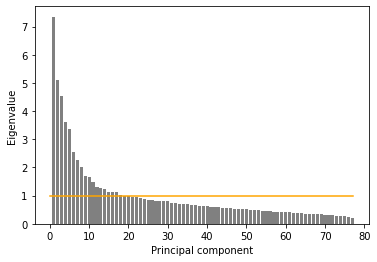

In [14]:
numClasses = 77
x = np.linspace(1,numClasses,numClasses)
plt.bar(x, eigVals, color='gray')
plt.plot([0,numClasses],[1,1],color='orange') # Orange Kaiser criterion line for the fox
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()

In [15]:
threshold = 1
print('Number of factors selected by Kaiser criterion:', np.count_nonzero(eigVals > threshold))

# 2) The "elbow" criterion: Pick only factors left of the biggest/sharpest
# drop. Here, this would yield 1 factor.
print('Number of factors selected by elbow criterion: 1')

# 3) Number of factors that account for 90% of the variance (Eigenvalues that 
# add up to 90% of the Eigensum. To account for at least 90% of the variability 
# in this data, we need 3 factors.
threshold = 90
eigSum = np.cumsum(covarExplained)
print('Number of factors to account for at least 90% variance:', np.count_nonzero(eigSum < threshold) + 1)

Number of factors selected by Kaiser criterion: 18
Number of factors selected by elbow criterion: 1
Number of factors to account for at least 90% variance: 56


In [16]:
pca_all = rotatedData[:,0:18]
pca_all.shape

(946, 18)

In [18]:
pca_all_names = ['PCA_P1','PCA_P2','PCA_P3','PCA_P4','PCA_P5','PCA_P6','PCA_P7','PCA_P8','PCA_P9','PCA_P10','PCA_P11','PCA_P12','PCA_P13','PCA_P14','PCA_P15','PCA_P16','PCA_P17','PCA_P18']

In [19]:
df_all = pd.DataFrame(pca_all, columns=pca_all_names)
df_all

,PCA_P1,PCA_P2,PCA_P3,PCA_P4,PCA_P5,PCA_P6,PCA_P7,PCA_P8,PCA_P9,PCA_P10,PCA_P11,PCA_P12,PCA_P13,PCA_P14,PCA_P15,PCA_P16,PCA_P17,PCA_P18
0,-2.155490,0.991711,1.525308,1.804542,0.114443,-0.005533,0.115224,-1.473749,2.383208,-1.268397,-1.445000,-0.620730,0.455445,-0.909851,0.921909,-0.145033,1.126895,-1.677862
1,-0.451911,-1.037441,0.423383,0.861459,-2.576960,0.672379,0.283758,-0.115107,1.862047,-0.058439,0.229140,0.497578,-0.702588,1.457928,0.663138,-1.392862,1.460273,-0.205770
2,2.122444,-2.051293,2.086674,-0.403549,0.496870,0.395018,0.702517,3.564425,-0.892142,-1.883085,-0.756162,0.083712,-0.456011,-2.226729,-0.217653,-0.218028,1.244031,-0.079712
3,-1.581452,-1.165621,-2.285779,-0.175034,-1.213935,0.499873,0.852480,0.271768,0.864513,0.658817,-0.158358,0.521269,2.069537,1.079501,0.138495,-0.628709,1.872734,-0.221344
4,-6.001680,0.239178,-0.772016,1.926972,0.519893,1.152018,2.744419,1.247660,2.830588,-1.008162,-2.718069,-0.125288,-1.347611,0.352491,2.398374,-0.128492,1.511958,0.081439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,-0.468659,-2.609080,2.036560,-0.652135,-1.687514,-0.709928,1.004992,-0.294456,0.563439,1.264185,-0.986203,0.120311,-0.645532,-1.050594,0.225117,-0.854710,0.460244,0.466496
942,2.398655,-4.163451,-1.410997,-0.475920,-0.508988,-3.325465,-4.240615,-3.853769,1.458017,1.208846,0.152542,-0.825834,-0.780844,-1.513521,0.271365,-2.128536,-1.095395,-0.277170
943,1.594045,-1.156491,4.632849,-0.945272,-0.504598,-1.349708,0.818289,-0.357707,1.630562,1.204922,-0.089129,1.656675,-1.264030,-0.859610,-0.651574,0.999861,1.857884,1.345263
944,0.010734,-1.835437,1.604513,2.468624,1.008629,0.578124,-3.122303,1.757237,-0.522929,1.598173,-1.534334,-1.740083,1.852695,-0.284297,1.421241,-0.162521,-0.094126,-2.408294


In [20]:
df = pd.read_csv('movieReplicationSet-2.csv')
labels_columns = df.columns[:400].to_list()
labels= df[labels_columns]

In [21]:
RMSE=[]
for i in range(400): 
    dataset=pd.DataFrame.merge(df_all,labels[labels_columns[i]], left_index =True , right_index = True,how = 'inner')
    dataset.dropna(inplace= True)
    x = dataset.iloc[:,:18]
    y = dataset.iloc[:,18:]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)
    
    from sklearn.model_selection import RandomizedSearchCV
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)] # Num of trees in random forest
    max_features = ['auto', 'sqrt'] # Num of features to consider at every split
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] # Max number of levels in tree
    max_depth.append(None) # Min number of samples required to split a node
    min_samples_split = [2, 5, 10] # Min number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4] # Method of selecting samples for training each tree
    bootstrap = [True, False]
    
    # Create random grid
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}
    
    # cross-validation
    rf = RandomForestRegressor()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
    rf_random.fit(x_train, y_train.values.ravel()) # Fit the random search model
    best_random = rf_random.best_estimator_
    testing= best_random.predict(x_test)
    rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, testing))
    print('Root mean squared error is '+str(round(rootMeanSqErr,2)))
    dataset['predicted_values'] = 0 # score on all data
    y_pred_mlr= best_random.predict(x)
    dataset['predicted_values'] = y_pred_mlr
    print(labels_columns[i])
    globals()['dataset_%s' % labels_columns[i][:-7].replace(' ','')] = dataset
    print('this is the DF dataset_%s' % labels_columns[i][:-7].replace(' ',''))
    print('-------')
    RMSE.append(rootMeanSqErr)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.31
The Life of David Gale (2003)
this is the DF dataset_TheLifeofDavidGale
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.04
Wing Commander (1999)
this is the DF dataset_WingCommander
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.95
Django Unchained (2012)
this is the DF dataset_DjangoUnchained
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.3
Alien (1979)
this is the DF dataset_Alien
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.94
Indiana Jones and the Last Crusade (1989)
this is the DF dataset_IndianaJonesandtheLastCrusade
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.15
Snatch (2000)
this is the DF dataset_Snatch
-------
Fitting 3 folds for 

Root mean squared error is 1.05
Terms of Endearment (1983)
this is the DF dataset_TermsofEndearment
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.02
Mission: Impossible II (2000)
this is the DF dataset_Mission:ImpossibleII
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.17
Lost in Translation (2003)
this is the DF dataset_LostinTranslation
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.16
Star Trek: The Motion Picture (1979)
this is the DF dataset_StarTrek:TheMotionPicture
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.94
Inglorious Bastards (2009)
this is the DF dataset_IngloriousBastards
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.98
Clueless (1995)
this is the DF dataset_Clueless
-------
Fitting 3 folds for each of 10 candidates,

[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.7sRoot mean squared error is 1.03
Shrek 2 (2004)
this is the DF dataset_Shrek2
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.77
Good Will Hunting (1997)
this is the DF dataset_GoodWillHunting
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.0s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.0s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.8s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   4.1s
[CV] 

[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.5sRoot mean squared error is 1.17
Just Like Heaven (2005)
this is the DF dataset_JustLikeHeaven
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.1s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   1.9s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   6.1s
[CV] END bo

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.6sRoot mean squared error is 1.23
Showgirls (1995)
this is the DF dataset_Showgirls
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   2.1s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   3.5s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.6s
[CV] END bootstrap=Fa

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   1.0s[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.2s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   2.6s
[CV] END bootstrap=True, max_depth=30,

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.9sRoot mean squared error is 1.08
Diamonds are Forever (1971)
this is the DF dataset_DiamondsareForever
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.14
Crossroads (2002)
this is the DF dataset_Crossroads
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   1.9s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total ti

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.6s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.6s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.8s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   2.8s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   1.1s
[CV] END bootstrap=True, max_depth=10,

[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   6.5s[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, ma

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.7sRoot mean squared error is 1.22
Torque (2004)
this is the DF dataset_Torque
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.6s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.8s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   3.8s
[CV] END bootstrap=True, ma

[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   4.0sRoot mean squared error is 1.13
Poltergeist (1982)
this is the DF dataset_Poltergeist
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.6s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.0s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=Tr

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.8s[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.5s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.5s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.9s
[CV] END bootstrap=False, max_depth=5

[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   5.0s[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.0s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.1s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   3.1s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=50,

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   3.0sRoot mean squared error is 1.18
Fear and Loathing in Las Vegas (1998)
this is the DF dataset_FearandLoathinginLasVegas
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.23
Barbarella (1968)
this is the DF dataset_Barbarella
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.1s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   5.3sRoot mean squared error is 1.2
The King of Marvin Gardens (1972)
this is the DF dataset_TheKingofMarvinGardens
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.36
The Poseidon Adventure (1972)
this is the DF dataset_ThePoseidonAdventure
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.26
The Rock (1996)
this is the DF dataset_TheRock
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.1
Love Story (1970)
this is the DF dataset_LoveStory
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.01
The Last Samurai (2003)
this is the DF dataset_TheLastSamurai
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.93
The Jungle Boo

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.3sRoot mean squared error is 1.21
12 Monkeys (1995)
this is the DF dataset_12Monkeys
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.06
From Hell (2001)
this is the DF dataset_FromHell
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.92
Dead Poets Society (1989)
this is the DF dataset_DeadPoetsSociety
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   2.0s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   4.4s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; to

[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   2.6s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   2.7s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   4.4s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   2.1s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, 

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.6sRoot mean squared error is 1.2
Once Upon a Time in America (1984)
this is the DF dataset_OnceUponaTimeinAmerica
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   4.3s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.9s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.5s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   3.

[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.7sRoot mean squared error is 1.14
Equilibrium (2002)
this is the DF dataset_Equilibrium
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.06
Star Wars: Episode II - Attack of the Clones (2002)
this is the DF dataset_StarWars:EpisodeII-AttackoftheClones
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   2.8s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.9s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   4.4s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_s

[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   2.1sRoot mean squared error is 1.29
The Thing (1982)
this is the DF dataset_TheThing
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.7s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.7s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.0s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   7.0s
[CV] END bootstrap=False

[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.7s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.7s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   2.6s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   3.2s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, max_depth=1

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   5.6s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.7s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   5.0s
[CV] END bootstrap=False, max_depth=60,

[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.8sRoot mean squared error is 0.79
Interstellar (2014)
this is the DF dataset_Interstellar
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.6s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.6s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.9s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstrap

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.9sRoot mean squared error is 1.14
Full Metal Jacket (1987)
this is the DF dataset_FullMetalJacket
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   3.2s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.8s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   4.8s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   3.8s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.6s
[CV] E

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.6sRoot mean squared error is 1.1
Big Fish (2003)
this is the DF dataset_BigFish
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   1.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   3.8s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.4s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   3.7s
[CV] END bootstrap=False, max

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   2.5s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   2.6s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstrap=False, max_depth=50

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3sRoot mean squared error is 1.59
Cool Hand Luke (1967)
this is the DF dataset_CoolHandLuke
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   2.2s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   3.6s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.6s
[CV] END bootstr

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   2.5s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   2.7s
[CV] END bootstrap=False, max_depth=9

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7sRoot mean squared error is 0.81
A Beautiful Mind (2001)
this is the DF dataset_ABeautifulMind
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.24
Sholay (1978)
this is the DF dataset_Sholay
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.32
The 51st State (2001)
this is the DF dataset_The51stState
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.5s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   3.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; tot

[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   2.7sRoot mean squared error is 1.11
Die Hard With a Vengeance (1995)
this is the DF dataset_DieHardWithaVengeance
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.12
Elf (2003)
this is the DF dataset_Elf
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.16
The Blue Lagoon (1980)
this is the DF dataset_TheBlueLagoon
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.14
Hellraiser (1987)
this is the DF dataset_Hellraiser
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.23
Moonraker (1979)
this is the DF dataset_Moonraker
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.51
Leon (1994)
this is the DF dataset_Leon
-------


[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.9sRoot mean squared error is 1.19
Oldboy (2003)
this is the DF dataset_Oldboy
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.25
Carrie (1976)
this is the DF dataset_Carrie
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.03
The Good the Bad and the Ugly (1966)
this is the DF dataset_TheGoodtheBadandtheUgly
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.3s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2

[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.0sRoot mean squared error is 1.16
Speed 2: Cruise Control (1997)
this is the DF dataset_Speed2:CruiseControl
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   8.4s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   5.1s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   2.

[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.5s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.4s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   2.3s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=60, 

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5sRoot mean squared error is 1.04
The Lord of the Rings: The Fellowship of the Ring (2001)
this is the DF dataset_TheLordoftheRings:TheFellowshipoftheRing
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.17
The Talented Mr. Ripley (1999)
this is the DF dataset_TheTalentedMr.Ripley
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   2.5s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END bootstrap=True, max_depth=100, max_feature

[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   5.0s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   2.2s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.6s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.2s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=False, max_dep

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5sRoot mean squared error is 1.36
Casino (1995)
this is the DF dataset_Casino
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.5s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.1s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   3.3s
[CV] END bootstrap=False, max_de

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.9s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.9s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   2.4s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   2.2s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, max_depth=1

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5sRoot mean squared error is 1.2
A Time to Kill (1996)
this is the DF dataset_ATimetoKill
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.5s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstra

[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   7.4sRoot mean squared error is 1.41
Blazing Saddles (1974)
this is the DF dataset_BlazingSaddles
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   3.1s
[CV] END bootstr

[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   4.7sRoot mean squared error is 1.1
The Doom Generation (1995)
this is the DF dataset_TheDoomGeneration
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.7s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.6s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.8s
[CV

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.8s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=60, 

[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.2sRoot mean squared error is 1.03
Armageddon (1998)
this is the DF dataset_Armageddon
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.6s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstrap=Tru

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3sRoot mean squared error is 0.87
X-Men (2000)
this is the DF dataset_X-Men
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   2.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.1s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.9s
[CV] END bootstrap=False, max_de

[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   4.0sRoot mean squared error is 1.22
Arachnophobia (1990)
this is the DF dataset_Arachnophobia
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.39
Stir Crazy (1980)
this is the DF dataset_StirCrazy
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.37
Billy Jack (1971)
this is the DF dataset_BillyJack
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.2s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total ti

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3sRoot mean squared error is 1.08
The Silencers (1966)
this is the DF dataset_TheSilencers
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.06
The Three Musketeers (1993)
this is the DF dataset_TheThreeMusketeers
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.02
Girl Interrupted (1999)
this is the DF dataset_GirlInterrupted
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.84
Finding Nemo (2003)
this is the DF dataset_FindingNemo
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.21
Tropic of Cancer (1970)
this is the DF dataset_TropicofCancer
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.94
The Sixth Sense (199

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.8sRoot mean squared error is 1.29
Rosemary's Baby (1968)
this is the DF dataset_Rosemary'sBaby
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.8s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.8s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   3.9s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END boot

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3sRoot mean squared error is 1.08
Cheaper by the Dozen (2003)
this is the DF dataset_CheaperbytheDozen
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END b

[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.8sRoot mean squared error is 1.23
Can't Hardly Wait (1998)
this is the DF dataset_Can'tHardlyWait
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.8s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.2s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   3.2s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   5.0s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.2s
[CV] END boot

[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   2.6s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   2.3s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, 

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.9sRoot mean squared error is 1.03
Die Another Day (2002)
this is the DF dataset_DieAnotherDay
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   4.5s
[CV] END bootstra

[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.9sRoot mean squared error is 0.79
Toy Story 2 (1999)
this is the DF dataset_ToyStory2
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.13
Transformers: Age of Extinction (2014)
this is the DF dataset_Transformers:AgeofExtinction
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.8s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   5.6s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_est

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.2s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.1s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.7s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   2.4s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, max_depth=10,

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7sRoot mean squared error is 1.27
Like Stars on Earth (2007)
this is the DF dataset_LikeStarsonEarth
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   3.1s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.5s
[CV] END 

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.8s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.0s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   2.9s
[CV] END bootstrap=True, max_depth=30

[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.7sRoot mean squared error is 1.14
Terminator 2: Judgement Day (1991)
this is the DF dataset_Terminator2:JudgementDay
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.3s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.9s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time= 

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3sRoot mean squared error is 1.26
25th Hour (2002)
this is the DF dataset_25thHour
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.6s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   2.0s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max

[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.7sRoot mean squared error is 1.06
Who's Afraid of Virginia Woolf (1966)
this is the DF dataset_Who'sAfraidofVirginiaWoolf
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   9.7s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.1s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; to

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3sRoot mean squared error is 1.19
Adaption (2002)
this is the DF dataset_Adaption
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   3.3sRoot mean squared error is 1.01
Life is Beautiful (1997)
this is the DF dataset_LifeisBeautiful
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.08
Room (2015)
this is the DF dataset_Room
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.19
Scream (1996)
this is the DF dataset_Scream
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.34
The Evil Dead (1981)
this is the DF dataset_TheEvilDead
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.03
Gangs of New York (2002)
this is the DF dataset_GangsofNewYork
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.89
Stand By Me (1986)
this is the DF dataset_StandByMe
-------


[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.5sRoot mean squared error is 1.03
The Vow (2012)
this is the DF dataset_TheVow
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.9
Toy Story 3 (2010)
this is the DF dataset_ToyStory3
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.06
The Matrix Reloaded (2003)
this is the DF dataset_TheMatrixReloaded
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.05
Once Upon a Time in the West (1968)
this is the DF dataset_OnceUponaTimeintheWest
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.94
Star Wars: Episode V - The Empire Strikes Back (1980)
this is the DF dataset_StarWars:EpisodeV-TheEmpireStrikesBack
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fi

[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   8.4sRoot mean squared error is 1.24
Se7en (1995)
this is the DF dataset_Se7en
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.7s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.3s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.3s
[CV] END bootstrap=False, max_de

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7sRoot mean squared error is 1.23
Happy Gilmore (1996)
this is the DF dataset_HappyGilmore
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.2
My Big Fat Greek Wedding (2002)
this is the DF dataset_MyBigFatGreekWedding
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.32
Boomerang (1992)
this is the DF dataset_Boomerang
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   2.8s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_

[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.8sRoot mean squared error is 1.05
The Avengers (2012)
this is the DF dataset_TheAvengers
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.5s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   3.6s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.1s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.7s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.2s
[CV] END bootstrap=Tru

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7sRoot mean squared error is 1.21
In America (2002)
this is the DF dataset_InAmerica
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.9s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   3.7s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   2.1s
[CV] END bootstrap=Fa

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5sRoot mean squared error is 0.87
Tarzan (1999)
this is the DF dataset_Tarzan
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.32
Scent of a Woman (1992)
this is the DF dataset_ScentofaWoman
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.24
The Cabin in the Woods (2012)
this is the DF dataset_TheCabinintheWoods
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.83
Spider-Man (2002)
this is the DF dataset_Spider-Man
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.5s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_sp

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.7sRoot mean squared error is 1.14
Broken Arrow (1996)
this is the DF dataset_BrokenArrow
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.7s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.1s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.1s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.7s
[CV] END bootstrap=Tru

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.6sRoot mean squared error is 1.25
Baby Geniuses (1999)
this is the DF dataset_BabyGeniuses
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.11
Battlefield Earth (2000)
this is the DF dataset_BattlefieldEarth
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.6s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   2.7s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total 

[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   2.4sRoot mean squared error is 1.11
The Firm (1993)
this is the DF dataset_TheFirm
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.12
De-Lovely (2004)
this is the DF dataset_De-Lovely
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.9s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.9s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   2.1s
[CV] END boot

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   2.4s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   2.7s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   1.9s
[CV] END bootstrap=False, max_dept

[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.6sRoot mean squared error is 1.07
Die Hard (1988)
this is the DF dataset_DieHard
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.7s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.5s
[CV] END bootstrap=False, max

[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   3.7sRoot mean squared error is 1.09
The Lord of the Rings: The Two Towers (2002)
this is the DF dataset_TheLordoftheRings:TheTwoTowers
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.03
The Blair Witch Project (1999)
this is the DF dataset_TheBlairWitchProject
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.94
Judge Dredd (1995)
this is the DF dataset_JudgeDredd
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.9
10 Things I Hate About You (1999)
this is the DF dataset_10ThingsIHateAboutYou
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.84
The Insider (1999)
this is the DF dataset_TheInsider
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   3.0sRoot mean squared error is 1.19
Erik the Viking (1989)
this is the DF dataset_EriktheViking
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.97
Pirates of the Caribbean: At World's End (2007)
this is the DF dataset_PiratesoftheCaribbean:AtWorld'sEnd
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.0
The Ring (2002)
this is the DF dataset_TheRing
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.99
The Truman Show (1998)
this is the DF dataset_TheTrumanShow
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.79
Forrest Gump (1994)
this is the DF dataset_ForrestGump
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.2

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.8sRoot mean squared error is 0.91
Black Hawk Down (2001)
this is the DF dataset_BlackHawkDown
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.99
Knight and Day (2010)
this is the DF dataset_KnightandDay
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.85
The Shawshank Redemption (1994)
this is the DF dataset_TheShawshankRedemption
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.01
Sleepy Hollow (1999)
this is the DF dataset_SleepyHollow
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.7s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samp

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.9sRoot mean squared error is 1.01
The Holiday (2006)
this is the DF dataset_TheHoliday
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.98
Sixteen Candles (1984)
this is the DF dataset_SixteenCandles
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   9.1s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   3.2s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   1.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   3.0s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   2.6s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   5.8s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.2s
[CV] END bootstrap=False, max_depth=80, m

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.6s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   8.8s
[CV] END bootstrap=True, max_depth=30, max

[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   3.6sRoot mean squared error is 1.08
10000 BC (2008)
this is the DF dataset_10000BC
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=  13.2s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.7s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   2.1s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.8s
[CV] END bootstrap=True, ma

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   4.7sRoot mean squared error is 1.07
Austin Powers: The Spy Who Shagged Me (1999)
this is the DF dataset_AustinPowers:TheSpyWhoShaggedMe
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.83
The Lion King (1994)
this is the DF dataset_TheLionKing
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.4s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_spl

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3sRoot mean squared error is 1.2
Child's Play (1988)
this is the DF dataset_Child'sPlay
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.95
Anger Management (2002)
this is the DF dataset_AngerManagement
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.6s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.6s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=  

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3sRoot mean squared error is 1.14
Angels in the Outfield (1994)
this is the DF dataset_AngelsintheOutfield
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.6s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   3.8s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.1s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] 

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   4.9sRoot mean squared error is 1.11
Wild Wild West (1999)
this is the DF dataset_WildWildWest
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.02
Split (2016)
this is the DF dataset_Split
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.6s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   3.9s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.8s
[CV] EN

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7sRoot mean squared error is 1.04
Bad Boys (1995)
this is the DF dataset_BadBoys
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.6s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.7s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.1s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   2.2s
[CV] END bootstrap=False, 

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   2.3s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.5s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.4s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   3.4s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.8s
[CV] END bootstrap=True, max_depth=50,

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3sRoot mean squared error is 0.92
The Prestige (2006)
this is the DF dataset_ThePrestige
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.42
American Graffiti (1973)
this is the DF dataset_AmericanGraffiti
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.8s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.6sRoot mean squared error is 1.19
Air Force One (1997)
this is the DF dataset_AirForceOne
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   2.2s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.7s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.4s
[CV] END bootstra

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.7sRoot mean squared error is 0.91
Harry Potter and the Sorcerer's Stone (2001)
this is the DF dataset_HarryPotterandtheSorcerer'sStone
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   2.3s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   2.3s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimat

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.6sRoot mean squared error is 1.22
Close Encounters of the Third Kind (1977)
this is the DF dataset_CloseEncountersoftheThirdKind
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.8
Hollow Man (2000)
this is the DF dataset_HollowMan
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.02
Point Break (1991)
this is the DF dataset_PointBreak
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   5.2s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.7s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_sample

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5sRoot mean squared error is 0.92
I Robot (2004)
this is the DF dataset_IRobot
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.88
The Dark Knight (2008)
this is the DF dataset_TheDarkKnight
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.95
Ghost (1990)
this is the DF dataset_Ghost
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.01
A Bug's Life (1998)
this is the DF dataset_ABug'sLife
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.11
American Pie (1999)
this is the DF dataset_AmericanPie
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.06
Daredevil (2003)
this is the DF dataset_Daredevil
-------
Fitting 3 fo

[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   2.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.7s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.9s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   4.6s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, m

[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.9sRoot mean squared error is 1.18
Cloverfield (2008)
this is the DF dataset_Cloverfield
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.88
Rush Hour 2 (2001)
this is the DF dataset_RushHour2
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   2.1s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   1.1s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   8.9s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV]

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.2sRoot mean squared error is 1.06
Bruce Almighty (2003)
this is the DF dataset_BruceAlmighty
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.11
Girl With a Pearl Earring (2003)
this is the DF dataset_GirlWithaPearlEarring
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.23
Grown Ups 2 (2013)
this is the DF dataset_GrownUps2
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.24
Best Laid Plans (1999)
this is the DF dataset_BestLaidPlans
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.99
Bram Stoker's Dracula (1992)
this is the DF dataset_BramStoker'sDracula
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=30

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   3.1sRoot mean squared error is 1.14
Fahrenheit 9/11 (2004)
this is the DF dataset_Fahrenheit9/11
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   9.0s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   3.5s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END boo

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3sRoot mean squared error is 1.11
Donnie Darko (2001)
this is the DF dataset_DonnieDarko
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.8s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=Tr

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.8s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   2.1s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.7s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   4.2s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=  12.0s
[CV] END bootstrap=False, max_depth=6

[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   4.0s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.2s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   4.0s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.0s
[CV] END bootstrap=False, max_depth=60,

[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.6sRoot mean squared error is 1.11
Bad Teacher (2011)
this is the DF dataset_BadTeacher
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.32
Cable Guy (1996)
this is the DF dataset_CableGuy
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.96
Ice Age (2002)
this is the DF dataset_IceAge
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.26
Misery (1990)
this is the DF dataset_Misery
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3sRoot mean squared error is 0.95
8 Mile (2002)
this is the DF dataset_8Mile
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.6s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.7s
[CV] END bootstrap=False, max_

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.7sRoot mean squared error is 0.79
Harry Potter and the Deathly Hallows: Part 2 (2011)
this is the DF dataset_HarryPotterandtheDeathlyHallows:Part2
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.5s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   2.1s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3sRoot mean squared error is 1.23
Ouija: Origin of Evil (2016)
this is the DF dataset_Ouija:OriginofEvil
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.11
The Deer Hunter (1978)
this is the DF dataset_TheDeerHunter
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   2.0s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   4.5s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.5s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; 

[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   3.1s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   3.1s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.8s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   4.1s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   2.8s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   5.0s
[CV] END bootstrap=False, max_depth=

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   1.5s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   3.6s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.8s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.5s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, 

[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   3.1sRoot mean squared error is 1.03
There's Something About Mary (1998)
this is the DF dataset_There'sSomethingAboutMary
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   3.5s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   2.3s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total t

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.5sRoot mean squared error is 1.15
Zoolander (2001)
this is the DF dataset_Zoolander
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.21
The Core (2003)
this is the DF dataset_TheCore
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.99
Spirited Away (2001)
this is the DF dataset_SpiritedAway
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.98
Rocky (1976)
this is the DF dataset_Rocky
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.7s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total t

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.8sRoot mean squared error is 1.11
Traffic (2000)
this is the DF dataset_Traffic
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.76
Monsters  Inc.(2001)
this is the DF dataset_MonstersInc
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.17
Thoroughly Modern Millie (1967)
this is the DF dataset_ThoroughlyModernMillie
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.4
Requiem for a Dream (2000)
this is the DF dataset_RequiemforaDream
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.99
Downfall (2004)
this is the DF dataset_Downfall
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.05
L.A. Confidential (1997)
this is 

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7sRoot mean squared error is 0.86
Toy Story (1995)
this is the DF dataset_ToyStory
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.18
Boy's Don't Cry (1999)
this is the DF dataset_Boy'sDon'tCry
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.2
Pearl Harbor (2001)
this is the DF dataset_PearlHarbor
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.8s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000;

[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   3.0s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.2s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=  12.3s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.6s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.3s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.6s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=False, max_dep

[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.5sRoot mean squared error is 1.15
A.I. Artificial Intelligence (2001)
this is the DF dataset_A.I.ArtificialIntelligence
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.24
The Sting (1973)
this is the DF dataset_TheSting
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.29
Scream 3 (2000)
this is the DF dataset_Scream3
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4sRoot mean squared error is 1.13
Congo (1995)
this is the DF dataset_Congo
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.8s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.8s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   4.9s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.8s
[CV] END bootstrap=False, max_d

[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   2.5sRoot mean squared error is 1.13
Bowling For Columbine (2002)
this is the DF dataset_BowlingForColumbine
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.3s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   3.6s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.6s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.3s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.8s
[CV] 

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   5.8s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   4.2s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   9.0s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=False, max_depth=

[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   5.6sRoot mean squared error is 1.06
What Women Want (2000)
this is the DF dataset_WhatWomenWant
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.01
Home Alone (1990)
this is the DF dataset_HomeAlone
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   2.3s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.3s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.8s
[

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4sRoot mean squared error is 0.98
How the Grinch Stole Christmas (2000)
this is the DF dataset_HowtheGrinchStoleChristmas
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.2
The Straight Story (1999)
this is the DF dataset_TheStraightStory
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.02
The Hulk (2003)
this is the DF dataset_TheHulk
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   2.0s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_sa

[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.5sRoot mean squared error is 1.23
Gigli (2002)
this is the DF dataset_Gigli
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=  18.8s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.5s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   2.1s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, max_d

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5sRoot mean squared error is 0.91
Rocky V (1991)
this is the DF dataset_RockyV
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.96
The Visit (2015)
this is the DF dataset_TheVisit
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.1s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   2.4s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.9s
[CV] END bootstra

[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   6.4s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   4.2s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   9.8s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.8s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   2.7s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   2.2s
[CV] END bootstrap=False, max_depth=

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7sRoot mean squared error is 0.91
Titanic (1997)
this is the DF dataset_Titanic
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   2.1s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   6.7s
[CV] END bootstrap=False

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7sRoot mean squared error is 1.23
A Clockwork Orange (1971)
this is the DF dataset_AClockworkOrange
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.0
Charlie's Angels (2000)
this is the DF dataset_Charlie'sAngels
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.32
Friday the 13th Part III (1982)
this is the DF dataset_Fridaythe13thPartIII
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   2.4s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, 

[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   3.0sRoot mean squared error is 1.05
Hannibal (2001)
this is the DF dataset_Hannibal
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   3.3s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   6.0s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   6.6s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END bootstrap=Fals

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3sRoot mean squared error is 0.94
Pulp Fiction (1994)
this is the DF dataset_PulpFiction
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.01
Crimson Tide (1995)
this is the DF dataset_CrimsonTide
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.15
Blow (2001)
this is the DF dataset_Blow
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.45
Ran (1985)
this is the DF dataset_Ran
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.96
Mulholland Dr. (2001)
this is the DF dataset_MulhollandDr.
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.09
Apocalypse Now (1979)
this is the DF dataset_ApocalypseNow
-------
Fitting 3 fol

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5sRoot mean squared error is 1.14
The Lord of the Rings: The Return of the King (2003)
this is the DF dataset_TheLordoftheRings:TheReturnoftheKing
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.97
Reservoir Dogs (1992)
this is the DF dataset_ReservoirDogs
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.13
Heavy Traffic (1973)
this is the DF dataset_HeavyTraffic
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.95
Memento (2000)
this is the DF dataset_Memento
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.22
Dogville (2003)
this is the DF dataset_Dogville
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=5

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5sRoot mean squared error is 0.99
American Psycho (2000)
this is the DF dataset_AmericanPsycho
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   2.7s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   2.3s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   4.6s
[CV] END boots

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   2.0sRoot mean squared error is 0.96
Kill Bill: Vol. 1 (2003)
this is the DF dataset_KillBill:Vol.1
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   5.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.2s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   2.3s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   4.4s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.1s
[CV] END bo

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   3.4s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   7.0s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.9s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.5s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=60

[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   3.0sRoot mean squared error is 1.21
The Fugitive (1993)
this is the DF dataset_TheFugitive
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.95
Bend it Like Beckham (2002)
this is the DF dataset_BenditLikeBeckham
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total 

[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   3.1sRoot mean squared error is 1.26
Austin Powers in Goldmember (2002)
this is the DF dataset_AustinPowersinGoldmember
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   3.1s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   6.2s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.0s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total t

[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   6.2sRoot mean squared error is 1.07
The Mummy Returns (2001)
this is the DF dataset_TheMummyReturns
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   5.1s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.1s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.8s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.9s
[CV] END 

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4sRoot mean squared error is 0.94
The Nightmare Before Christmas (1993)
this is the DF dataset_TheNightmareBeforeChristmas
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.19
La La Land (2016)
this is the DF dataset_LaLaLand
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   3.0s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   3.5s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimato

[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   7.2sRoot mean squared error is 1.2
Flowers in the Attic (1987)
this is the DF dataset_FlowersintheAttic
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   3.3s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.9s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.6s
[CV] END 

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.4sRoot mean squared error is 1.15
28 Days Later (2002)
this is the DF dataset_28DaysLater
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.5s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   4.7s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.7s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstra

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   5.3sRoot mean squared error is 1.03
The Princess Bride (1987)
this is the DF dataset_ThePrincessBride
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   3.9s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=  10.1s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.4s
[CV] EN

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.9sRoot mean squared error is 0.96
The Green Mile (1999)
this is the DF dataset_TheGreenMile
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.97
Predator (1987)
this is the DF dataset_Predator
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   2.2s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   4.3s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.1s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] E

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   2.2sRoot mean squared error is 1.16
A Night at the Roxbury (1998)
this is the DF dataset_ANightattheRoxbury
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   3.1s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   2.8s


[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.4sRoot mean squared error is 1.23
Ed Wood (1994)
this is the DF dataset_EdWood
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.7s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   2.0s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.4s
[CV] END bootstrap=True, max_dep

[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.2sRoot mean squared error is 1.11
Aliens (1986)
this is the DF dataset_Aliens
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   2.4s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.1s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   5.4s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, max

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.7sRoot mean squared error is 1.02
Meet the Parents (2000)
this is the DF dataset_MeettheParents
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.97
Independence Day (1996)
this is the DF dataset_IndependenceDay
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.05
Who Framed Roger Rabbit (1988)
this is the DF dataset_WhoFramedRogerRabbit
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.06
As Good as it Gets (1997)
this is the DF dataset_AsGoodasitGets
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.32
Butch Cassidy and the Sundance Kid (1969)
this is the DF dataset_ButchCassidyandtheSundanceKid
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.9sRoot mean squared error is 1.18
The Babadook (2014)
this is the DF dataset_TheBabadook
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   5.3s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.3s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.8s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   3.3s
[CV] END bootstrap

[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.9sRoot mean squared error is 1.25
Saw (2004)
this is the DF dataset_Saw
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.13
Star Wars: Episode VI - The Return of the Jedi (1983)
this is the DF dataset_StarWars:EpisodeVI-TheReturnoftheJedi
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   2.3s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.9s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   2.0s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_sp

[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.4sRoot mean squared error is 1.09
Scry Movie (2000)
this is the DF dataset_ScryMovie
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.97
E.T. The Extra-Terrestrial (1982)
this is the DF dataset_E.T.TheExtra-Terrestrial
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   5.6s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.6sRoot mean squared error is 1.19
American History X (1998)
this is the DF dataset_AmericanHistoryX
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.1s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   2.7s
[CV] END b

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.3sRoot mean squared error is 1.32
FeardotCom (2002)
this is the DF dataset_FeardotCom
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.21
Halloween (1978)
this is the DF dataset_Halloween
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.33
Along Came a Spider (2002)
this is the DF dataset_AlongCameaSpider
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.2s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200

[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.5sRoot mean squared error is 1.16
The Mist (2007)
this is the DF dataset_TheMist
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.9s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   3.9s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   7.4s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.9s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=  10.9s
[CV] END bootstrap=True, m

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   1.1s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.8s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   2.1s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, max_depth=3

[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   7.4sRoot mean squared error is 0.75
Aladdin (1992)
this is the DF dataset_Aladdin
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.98
Pirates of the Caribbean: The Curse of the Black Pearl (2003)
this is the DF dataset_PiratesoftheCaribbean:TheCurseoftheBlackPearl
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.9
Men in Black (1997)
this is the DF dataset_MeninBlack
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   3.8s
[CV] END bootstrap=False, max_depth=90, max_features=s

[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   2.2sRoot mean squared error is 1.01
Eternal Sunshine of the Spotless Mind (2004)
this is the DF dataset_EternalSunshineoftheSpotlessMind
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.03
Ocean's Eleven (2001)
this is the DF dataset_Ocean'sEleven
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   3.7s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_sam

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.2sRoot mean squared error is 0.89
Men in Black II (2002)
this is the DF dataset_MeninBlackII
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.4s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   3.2s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END boots

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   3.4sRoot mean squared error is 0.88
Cocktail (1988)
this is the DF dataset_Cocktail
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.95
The Wolf of Wall Street (2013)
this is the DF dataset_TheWolfofWallStreet
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.32
The Game (1997)
this is the DF dataset_TheGame
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.16
Red Sonja (1985)
this is the DF dataset_RedSonja
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.5s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_e

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.8sRoot mean squared error is 0.68
One Flew Over the Cuckoo's Nest (1975)
this is the DF dataset_OneFlewOvertheCuckoo'sNest
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   3.1s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.7s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; to

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5sRoot mean squared error is 1.1
Freddy Got Fingered (2001)
this is the DF dataset_FreddyGotFingered
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.92
The Village (2004)
this is the DF dataset_TheVillage
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.79
Miller's Crossing (1990)
this is the DF dataset_Miller'sCrossing
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   3.3s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4sRoot mean squared error is 1.14
My Best Friend's Wedding (1997)
this is the DF dataset_MyBestFriend'sWedding
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.92
Iron Man 3 (2013)
this is the DF dataset_IronMan3
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.95
Big Daddy (1999)
this is the DF dataset_BigDaddy
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.11
Suspiria (1977)
this is the DF dataset_Suspiria
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.16
The Passenger (1975)
this is the DF dataset_ThePassenger
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.6sRoot mean squared error is 1.05
The Station Agent (2003)
this is the DF dataset_TheStationAgent
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.91
Jurassic Park (1993)
this is the DF dataset_JurassicPark
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.91
Captain America: Civil War (2016)
this is the DF dataset_CaptainAmerica:CivilWar
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.2
A Perfect Murder (1998)
this is the DF dataset_APerfectMurder
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.9s
[CV] END bootstrap=True, max_depth=100, max_features=auto

[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.9sRoot mean squared error is 0.89
Analyze That (2002)
this is the DF dataset_AnalyzeThat
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   2.9s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   7.1s
[CV] END bootstrap=

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.8sRoot mean squared error is 1.03
Braveheart (1995)
this is the DF dataset_Braveheart
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   3.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   3.6s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   1.3s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   4.5s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   2.4s
[CV] END bootstrap=T

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.5s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   3.8s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   5.2s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   2.5s
[CV] END bootstrap=True, max_depth=50

[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.3sRoot mean squared error is 0.83
Inception (2010)
this is the DF dataset_Inception
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.99
Groundhog Day (1993)
this is the DF dataset_GroundhogDay
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.2
The Lookout (2007)
this is the DF dataset_TheLookout
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.04
21 Grams (2003)
this is the DF dataset_21Grams
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   1.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200

[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=  12.2sRoot mean squared error is 1.06
Gladiator (2000)
this is the DF dataset_Gladiator
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.27
Midnight Cowboy (1969)
this is the DF dataset_MidnightCowboy
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.15
Fatal Attraction (1987)
this is the DF dataset_FatalAttraction
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.45
House of Sand and Fog (2003)
this is the DF dataset_HouseofSandandFog
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.97
On Golden Pond (1981)
this is the DF dataset_OnGoldenPond
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=30, max_features=sqr

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7sRoot mean squared error is 1.12
The Mummy (1999)
this is the DF dataset_TheMummy
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   2.0s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   2.4s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END bootstrap=Fals

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4sRoot mean squared error is 1.12
The Descent (2005)
this is the DF dataset_TheDescent
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   3.4s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   4.2s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.1s
[CV] END bootstrap=Tr

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   1.4sRoot mean squared error is 0.97
Runaway Bride (1999)
this is the DF dataset_RunawayBride
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   2.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   3.1s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.8s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.9s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.6s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.8s
[CV] END bootstrap=True, max_depth=30

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5sRoot mean squared error is 0.79
Harry Potter and the Goblet of Fire (2005)
this is the DF dataset_HarryPotterandtheGobletofFire
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.14
Gods and Generals (2003)
this is the DF dataset_GodsandGenerals
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   3.1s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samp

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3sRoot mean squared error is 1.29
My Father and My Son (2005)
this is the DF dataset_MyFatherandMySon
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 0.92
X-Men 2 (2003)
this is the DF dataset_X-Men2
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.8s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s


[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4sRoot mean squared error is 1.22
The Usual Suspects (1995)
this is the DF dataset_TheUsualSuspects
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.0
The Mask (1994)
this is the DF dataset_TheMask
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.01
Jaws (1975)
this is the DF dataset_Jaws
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.8s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   5

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5sRoot mean squared error is 0.82
Harry Potter and the Chamber of Secrets (2002)
this is the DF dataset_HarryPotterandtheChamberofSecrets
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   4.0s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.9s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimato

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3sRoot mean squared error is 1.12
Patton (1970)
this is the DF dataset_Patton
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.09
Anaconda (1997)
this is the DF dataset_Anaconda
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.07
Twister (1996)
this is the DF dataset_Twister
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   2.8s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.5s
[CV] EN

[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.8s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.6s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.2s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   3.2s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5sRoot mean squared error is 0.99
MacArthur (1977)
this is the DF dataset_MacArthur
-------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Root mean squared error is 1.12
Look Who's Talking (1989)
this is the DF dataset_LookWho'sTalking
-------


In [23]:
sum(RMSE)/len(RMSE) # AVG RMSE - accuracy of model

1.0852097615027931

In [43]:
dataset_TheMummyReturns

,PCA_P1,PCA_P2,PCA_P3,PCA_P4,PCA_P5,PCA_P6,PCA_P7,PCA_P8,PCA_P9,PCA_P10,PCA_P11,PCA_P12,PCA_P13,PCA_P14,PCA_P15,PCA_P16,PCA_P17,PCA_P18,The Mummy Returns (2001),predicted_values
4,-6.001680,0.239178,-0.772016,1.926972,0.519893,1.152018,2.744419,1.247660,2.830588,-1.008162,-2.718069,-0.125288,-1.347611,0.352491,2.398374,-0.128492,1.511958,0.081439,2.5,3.361885
5,-4.397649,-0.131721,1.231592,-2.769085,-3.032587,2.192778,1.757154,-0.379393,-0.210959,-0.799015,1.987783,1.057951,-0.103222,0.525325,0.428080,0.426776,0.306014,-0.112510,4.0,2.613995
7,0.713523,-3.292067,-0.847571,-2.911433,-0.377677,-0.803363,-1.345641,-0.160124,0.059981,-0.091767,-1.392863,-0.159215,-0.145846,0.853264,0.267631,1.547569,-0.384458,0.261247,3.0,2.616908
9,0.760128,-3.852266,2.916880,0.281142,2.174764,-3.024644,-0.498285,2.516563,-1.924982,1.471485,-0.029163,-0.606656,-1.273487,-1.243534,-1.834612,-1.505872,0.194903,-2.000989,4.0,2.338955
11,1.130149,-0.560657,-4.169935,1.970138,-0.623886,-0.604347,0.288629,-1.591381,-0.022387,-1.188484,0.057501,0.216813,-0.222645,-1.057259,0.326312,-1.083180,-0.070739,-0.640915,1.0,2.221930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,4.059501,-0.935103,-2.764955,-0.077343,-0.343567,-1.693293,-0.264864,2.534842,1.359697,-1.638597,-1.383016,1.860733,2.096045,1.110649,0.061954,-0.662380,-0.510810,0.119554,1.0,2.159382
940,-5.018242,0.200122,3.449800,-1.469082,-1.541485,-4.281652,1.326406,-0.767950,0.359347,0.217385,0.655700,-0.388366,1.642103,-2.014248,-0.883625,0.784411,0.454996,2.134835,2.0,2.523074
941,-0.468659,-2.609080,2.036560,-0.652135,-1.687514,-0.709928,1.004992,-0.294456,0.563439,1.264185,-0.986203,0.120311,-0.645532,-1.050594,0.225117,-0.854710,0.460244,0.466496,1.0,2.815786
943,1.594045,-1.156491,4.632849,-0.945272,-0.504598,-1.349708,0.818289,-0.357707,1.630562,1.204922,-0.089129,1.656675,-1.264030,-0.859610,-0.651574,0.999861,1.857884,1.345263,2.0,2.662611


In [32]:
#linearregression

RMSE2 = []
for i in range(400): 
    dataset=pd.DataFrame.merge(df_all,labels[labels_columns[i]], left_index =True , right_index = True,how = 'inner')
    dataset.dropna(inplace= True)
    x = dataset.iloc[:,:18]
    y = dataset.iloc[:,18:]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)
    from sklearn.model_selection import RandomizedSearchCV
 
    # cross-validation
    
    mlr = LinearRegression()  
 
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    parameters = {'normalize':[True,False]}
    mlr_random = RandomizedSearchCV(estimator = mlr, param_distributions = parameters, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
    
    # Fit the random search model
    best_mlr = mlr_random.fit(x_train, y_train)
    testing= best_mlr.predict(x_test)
    rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, testing))
    print('Root mean squared error is '+str(round(rootMeanSqErr,2)))
    dataset['predicted_values'] = 0 # score on all data
    y_pred_mlr= best_mlr.predict(x)
    dataset['predicted_values'] = y_pred_mlr
    print(labels_columns[i])
    globals()['dataset_%s' % labels_columns[i][:-7].replace(' ','')] = dataset
    print('this is the DF dataset_%s' % labels_columns[i][:-7].replace(' ',''))
    print('-------')
    RMSE2.append(rootMeanSqErr)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Root mean squared error is 1.68
The Life of David Gale (2003)
this is the DF dataset_TheLifeofDavidGale
-------
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Root mean squared error is 1.45
Wing Commander (1999)
this is the DF dataset_WingCommander
-------
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Root mean squared error is 0.99
Django Unchained (2012)
this is the DF dataset_DjangoUnchained
-------
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Root mean squared error is 1.31
Alien (1979)
this is the DF dataset_Alien
-------
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Root mean squared error is 0.97
Indiana Jones and the Last Crusade (1989)
this is the DF dataset_IndianaJonesandtheLastCrusade
-------
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Root mean squared error is 1.25
Snatch (2000)
this is the DF dataset_Snatch
-------
Fitting 3 folds for each of 2 c

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

..................normalize=True; total time=   0.0s
[CV] END .....................................normalize=True; total time=   0.0s
[CV] END .....................................normalize=True; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END .....................................normalize=True; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END ....................................normalize=F

eline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence t

KeyboardInterrupt: 

In [31]:
sum(RMSE2)/len(RMSE2) # avg RMSE of linear regression

1.204231891899911

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

[CV] END .....................................normalize=True; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END .....................................normalize=True; total time=   0.0s
[CV] END .....................................normalize=True; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END .....................................normalize=True; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END .....................................normalize=True; total time=   0.0s
[CV] END ...................

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
I

[CV] END .....................................normalize=True; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END .....................................normalize=True; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END .....................................normalize=True; total time=   0.0s
[CV] END .....................................normalize=True; total time=   0.0s
[CV] END .....................................normalize=True; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END .....................................normalize=True; total time=   0.0s
[CV] END .....................................normalize=True; total time=   0.0s
[CV] END ...................

[CV] END .....................................normalize=True; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END .....................................normalize=True; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END .....................................normalize=True; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END .....................................normalize=True; total time=   0.0s
[CV] END .....................................normalize=True; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END .....................................normalize=True; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END ...................

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

[CV] END ....................................normalize=False; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END .....................................normalize=True; total time=   0.0s
[CV] END .....................................normalize=True; total time=   0.0s
[CV] END .....................................normalize=True; total time=   0.0s
[CV] END .....................................normalize=True; total time=   0.0s
[CV] END .....................................normalize=True; total time=   0.0s
[CV] END .....................................normalize=True; total time=   0.0s
[CV] END .....................................normalize=True; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END .....................................normalize=True; total time=   0.0s
[CV] END ...................

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
I

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed

[CV] END .....................................normalize=True; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END .....................................normalize=True; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END .....................................normalize=True; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END .....................................normalize=True; total time=   0.0s
[CV] END .....................................normalize=True; total time=   0.0s
[CV] END .....................................normalize=True; total time=   0.0s
[CV] END .....................................normalize=True; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END .....................................normalize=True; total time=   0.0s
[CV] END ...................

[CV] END ....................................normalize=False; total time=   0.0s
[CV] END .....................................normalize=True; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END .....................................normalize=True; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END .....................................normalize=True; total time=   0.0s
[CV] END .....................................normalize=True; total time=   0.0s
[CV] END ....................................normalize=False; total time=   0.0s
[CV] END ...................

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
I